In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import os
from yellowbrick.cluster import KElbowVisualizer
os.chdir(r'C:\Users\QQ\Documents\Learning\The Data Science Course')

In [179]:
data = pd.read_csv('train-set.csv')
df = data.copy()

In [180]:
df.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [182]:
df.dropna(inplace= True)
df.drop(['CustomerID', 'Segmentation'], axis =1, inplace = True)

### Univariate Visualization

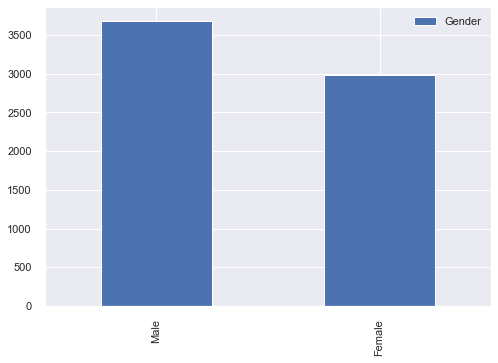

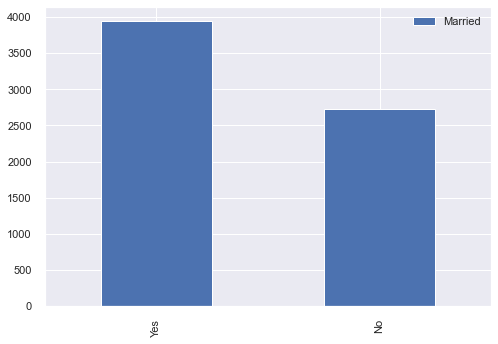

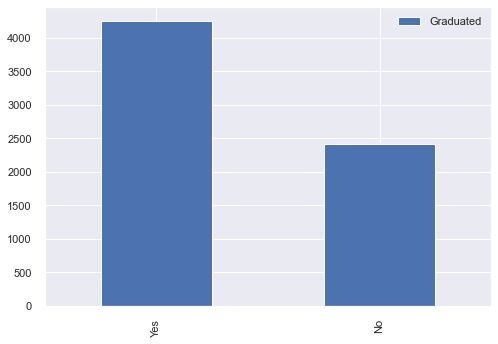

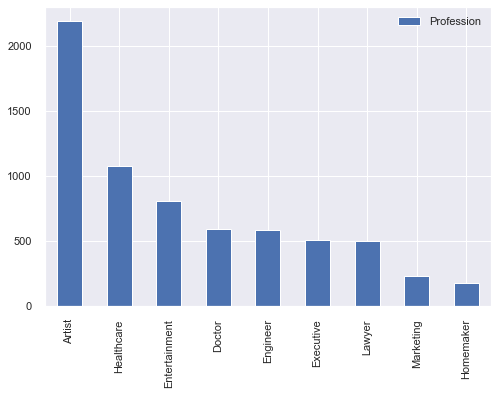

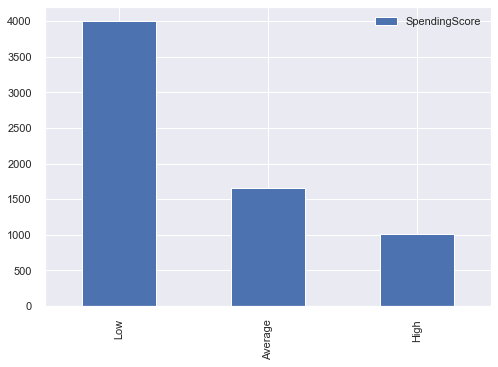

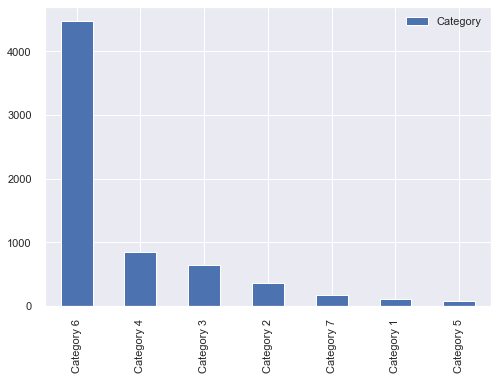

In [183]:
categorical_vars = ['Gender', 'Married', 'Graduated', 'Profession','SpendingScore', 'Category']

for var in categorical_vars:
    feature_df = pd.DataFrame(df[var].value_counts())
    feature_df.plot(kind = 'bar')

In [184]:
cont_vars = []
for var in df.columns:
    i = var in categorical_vars
    if i==False:
        cont_vars.append(var)

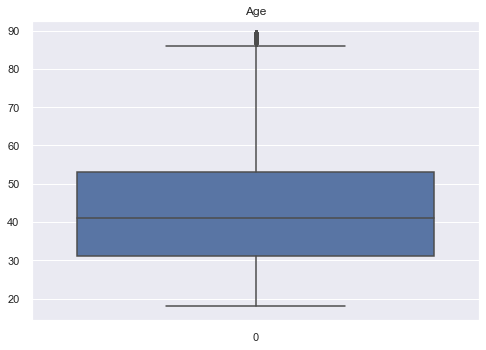

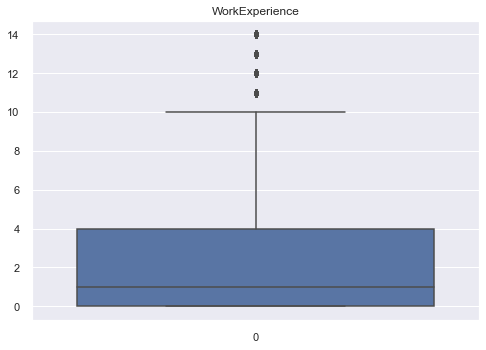

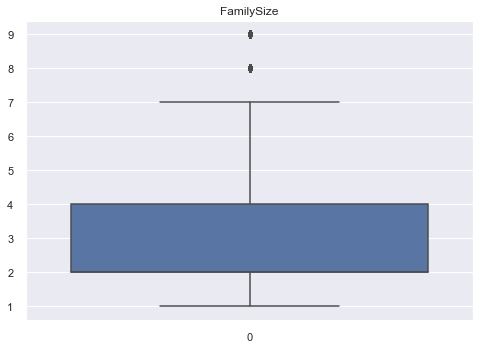

<Figure size 576x396 with 0 Axes>

In [185]:
for var in cont_vars:
    sns.boxplot(data = df[var]).set_title(var)
    plt.figure()

### FAMD

In [186]:
famd = prince.FAMD(n_components = 10,
                  copy = True,
                  check_input = True,
                  engine = 'auto',
                  random_state = 42)

In [187]:
famd_mod = famd.fit(df)

In [188]:
sum(famd_mod.explained_inertia_)

0.6782843700634394

In [189]:
df_famd = pd.DataFrame(famd_mod.row_coordinates(df))

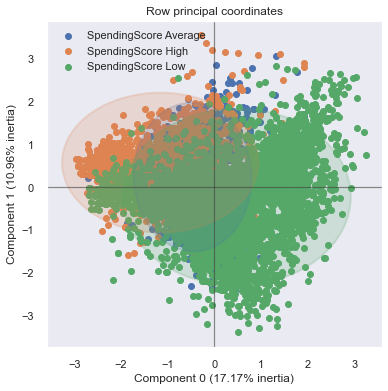

In [190]:
# Row coordinates for implemented FAMD
axes = famd.plot_row_coordinates(df,
                                x_component = 0,
                                y_component = 1,
                                color_labels =['SpendingScore {}'.format(t) for t in df['SpendingScore']],
                                ellipse_outline = True,
                                ellipse_fill = True,
                                show_points = True)

### K-Means

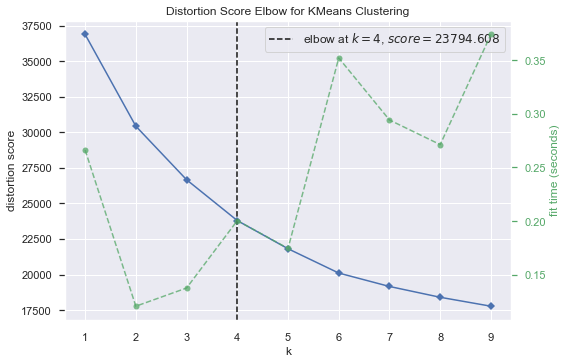

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [191]:
model = KMeans()
visualizer = KElbowVisualizer(model, k =(1,10), timings = True)
visualizer.fit(df_famd)
visualizer.show()

In [192]:
kmeans = KMeans(4)
kmeans.fit(df_famd)
df_famd['cluster'] = kmeans.predict(df_famd)

In [193]:
df_famd.head()

,0,1,2,3,4,5,6,7,8,9,cluster
0,1.940121,0.892682,-0.511642,0.486740,-0.283081,0.403383,-0.075085,-0.512081,-0.083172,-0.421255,0
2,-1.438066,-0.498724,-0.798552,0.060976,1.113949,0.276574,-0.404894,-0.467185,-0.072601,-0.260475,3
3,-2.172403,0.541081,-0.232210,1.062156,-0.219940,-0.499845,0.369583,-0.034221,0.149764,0.011676,1
5,-1.053780,0.436183,-0.136999,-0.536363,-0.389196,0.548945,-0.223001,-0.383502,-0.332242,0.135804,3
6,0.910441,0.115575,-0.758868,0.013411,-0.772541,-0.743064,0.008437,-0.280465,-0.225418,-0.150687,0


In [194]:
kmeans_df = df.join(df_famd['cluster'], how = 'left')

In [195]:
kmeans_df.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,3
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,1
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Category 6,3
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Category 6,0


### EDA on Dataframe of Original Features with new Clusters

Text(0.5, 1.0, 'Cluster Distribution of Customer')

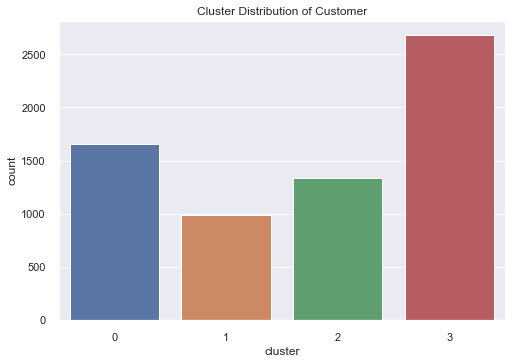

In [196]:
sns.countplot(x = kmeans_df['cluster'])
plt.title('Cluster Distribution of Customer')

In [197]:
k_exp_df = kmeans_df.copy()
k_exp_df.drop('cluster', axis = 1, inplace = True)
k_cat_vars = [var for var in k_exp_df.columns if k_exp_df[var].dtype == 'object']
k_cont_vars = [var for var in k_exp_df.columns if k_exp_df[var]. dtype != 'object']

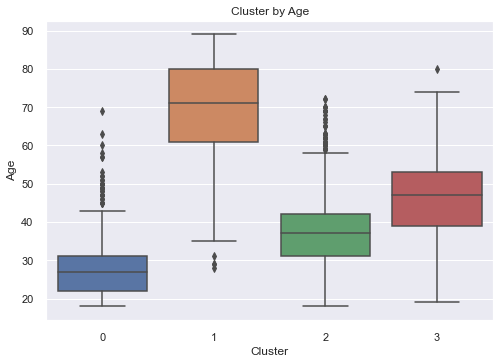

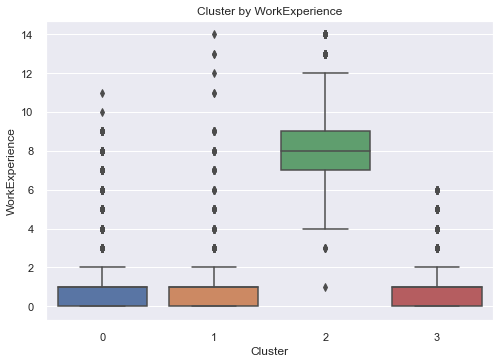

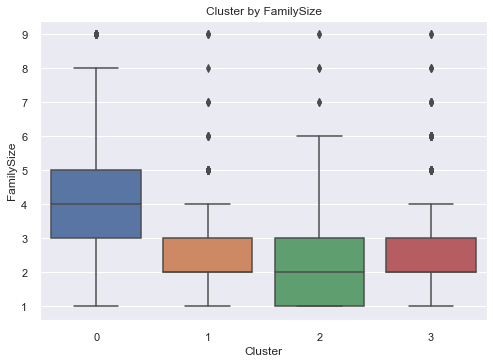

In [198]:
for cont_var in k_cont_vars:
    plt.figure()
    sns.boxplot(x = kmeans_df['cluster'], y = kmeans_df[cont_var])
    plt.xlabel('Cluster')
    plt.ylabel(cont_var)
    plt.title('Cluster by ' + cont_var)

<Figure size 576x396 with 0 Axes>

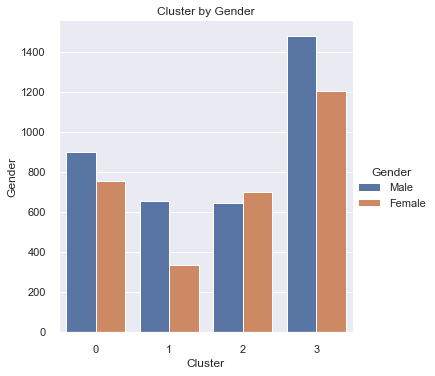

<Figure size 576x396 with 0 Axes>

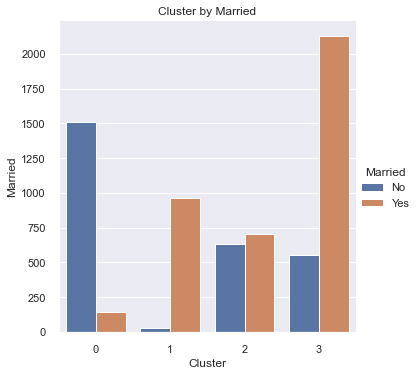

<Figure size 576x396 with 0 Axes>

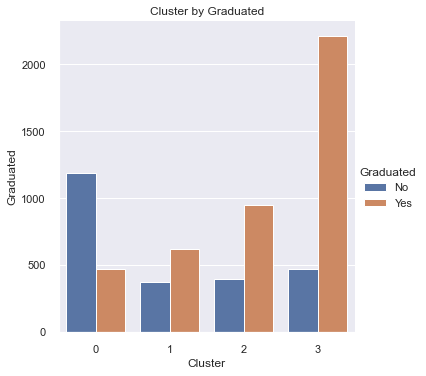

<Figure size 576x396 with 0 Axes>

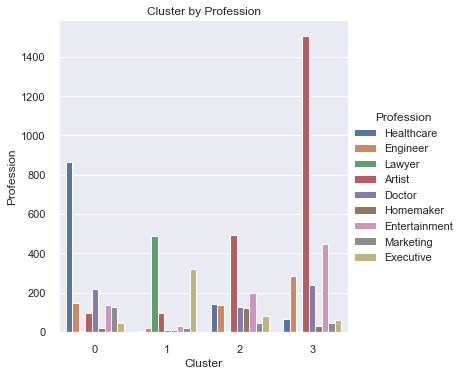

<Figure size 576x396 with 0 Axes>

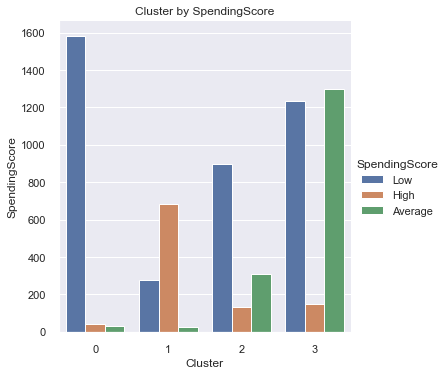

<Figure size 576x396 with 0 Axes>

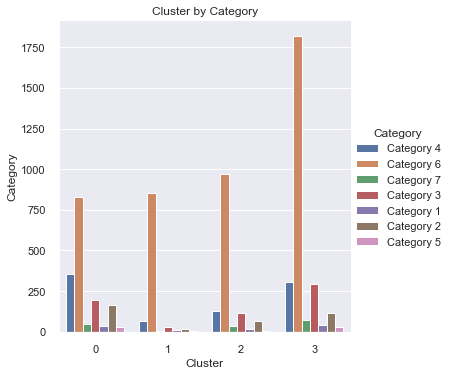

In [199]:
for cat_var in k_cat_vars:
    plt.figure()
    sns.catplot(x = 'cluster', hue = cat_var, data = kmeans_df, kind = 'count' )
    plt.xlabel('Cluster')
    plt.ylabel(cat_var)
    plt.title('Cluster by ' + cat_var)